# Trabalho 2 - C209 L1
## Efeitos sonoros
## Chorus

Marcelo Henrique Souza Abrantes      1538      GEC

**Definição:**

Chorus é um efeito de áudio que cria a sensação de múltiplas fontes sonoras semelhantes tocando simultaneamente. Isso é alcançado ao duplicar o sinal original, atrasar ligeiramente uma das cópias e modificar a frequência dessa cópia atrasada. Quando esses sinais são combinados, cria-se um efeito que parece com várias vozes ou instrumentos tocando ao mesmo tempo, dando uma sensação de espacialidade e profundidade ao som.

O código realiza a aplicação do efeito com o áudio fornecido pelo usuário.

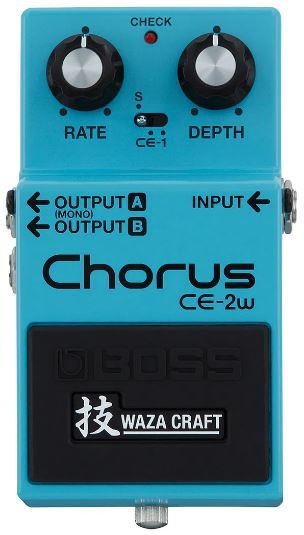 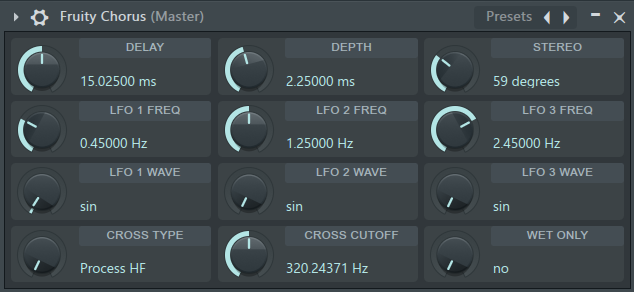

No código foi utilizado a biblioteca pydub que foi instalada com o código:

**pip install pydub**.

Passo a passo do código:


* **1.** Importação de Módulos:
  
Começamos importando os módulos necessários. AudioSegment é utilizado para carregar e salvar arquivos de áudio, enquanto numpy é usado para manipulação de arrays e cálculos matemáticos.
  .
* **2.** Definição da Função Chorus

A função apply_chorus_effect recebe como entrada o arquivo de áudio, juntamente com parâmetros para controlar o efeito de coro, como profundidade, atraso, velocidade e mixagem.

* **3.** Inicio do Funcionamento

Os samples de áudio são extraídos e convertidos em um array do tipo numpy.float32 para facilitar o processamento. Um novo array chamado chorus é criado para armazenar o áudio modificado com o efeito de coro.

* **4.** A implementação do efeito

A Implementação envolve a aplicação de um deslocamento no tempo ao sinal original, juntamente com a adição de uma versão modificada do sinal original. Isso é feito usando uma função seno para gerar um deslocamento variável ao longo do tempo, com base nos parâmetros fornecidos.  
 
* **5.** Saída da Função

Por fim, o áudio modificado é encapsulado em um novo objeto AudioSegment e retornado como saída da função.
  
* **6.** Aplicação do efeito

O código carrega o arquivo de áudio desejado usando AudioSegment.from_file. Em seguida, aplica-se o efeito de coro chamando a função apply_chorus_effect com os parâmetros desejados.

* **7.** Exportação do áudio

O audio é exportado para o caminho desejado.

## Parâmetros:
**depth:**
a profundidade do efeito de coro

**delay:**
o atraso do efeito de coro

**speed:**
a velocidade do efeito de coro

**mix:**
o nível de mixagem do efeito de coro

## Extra:
**Redução de Ruído:**
Após a aplicação do efeito de coro, chamamos a função apply_noise_reduction para suavizar o sinal de áudio e reduzir o ruído. A função utiliza um filtro de média móvel para realizar a redução de ruído, onde window_size representa o tamanho da janela para o cálculo da média móvel.

## Código

In [1]:
from pydub import AudioSegment
import numpy as np

def apply_chorus_effect(audio, depth, delay, speed, mix):
    samples = audio.get_array_of_samples()
    track = np.array(samples, dtype=np.float32)

    chorus = np.empty_like(track)

    for i in range(len(track)):
        chorus[i] = track[i] + mix * track[(i - delay - int(depth * np.sin(2 * np.pi * speed * i / audio.frame_rate))) % len(track)]

    chorus = np.clip(chorus, -2**15, 2**15 - 1)
    chorus = chorus.astype(np.int16)

    return AudioSegment(chorus.tobytes(), frame_rate=audio.frame_rate, sample_width=2, channels=audio.channels)

def apply_noise_reduction(audio, window_size=3):
    samples = audio.get_array_of_samples()
    samples = np.array(samples, dtype=np.float32)

    # Aplicação de filtro de média móvel para redução de ruído
    smoothed_samples = np.convolve(samples, np.ones(window_size) / window_size, mode='same')

    # Atualização do áudio com o sinal suavizado
    audio = audio._spawn(smoothed_samples.astype(np.int16))

    return audio

# Carregar o arquivo de áudio
audio_file = AudioSegment.from_file("audiocurto.wav")

# Aplicar o efeito de coro
audio_with_chorus = apply_chorus_effect(audio_file, depth=100, delay=20, speed=0.5, mix=0.5)

# Redução de ruído
audio_with_chorus_and_noise_reduction = apply_noise_reduction(audio_with_chorus, window_size=5)

# Salvar o áudio resultante
audio_with_chorus_and_noise_reduction.export("audiocurtoefeito.wav", format="wav")


<_io.BufferedRandom name='audiocurtoefeito.wav'>